# PyTorch 60 Minute Blitz

Wnixalo

2018/2/18

## I. What is PyTorch

---

It's a Python based scientific computing package targeted at two sets of audiences:

* A replacement for NumPy to use the power of GPUs
* A Deep Learning research platform that provides maximum flexibility and speed.

### 1. Getting Started

#### a. Tensors

Tensors are similar to NumPy's ndarrays, with the addition being that Tensors can also be used on a GPU to accelerate computing.

In [1]:
import torch

Construct a 5x3 matrix, unitialized:

In [2]:
x = torch.Tensor(5, 3)
print(x)


 0.0000e+00 -2.5244e-29  0.0000e+00
-2.5244e-29 -2.4680e+18  4.5874e-41
 0.0000e+00  0.0000e+00  0.0000e+00
 0.0000e+00  7.0065e-45         nan
        nan         nan  1.5545e-17
[torch.FloatTensor of size 5x3]



Get its size:

In [3]:
print(x.size())

torch.Size([5, 3])


**!NOTE¡**: `torch.Size` is in fact a tuple, so it supports all tuple operations.

#### b. Operations

There are multiple syntaxes for operations. In the following example, we will take a look at the addition operation.

Addition: synax 1

In [4]:
y = torch.rand(5, 3)
print(x + y)


 5.9837e-01  4.7971e-01  7.4374e-01
 4.5735e-02 -2.4680e+18  1.6743e-01
 5.0462e-01  4.9030e-01  2.7039e-01
 8.9515e-01  9.7799e-01         nan
        nan         nan  6.3603e-01
[torch.FloatTensor of size 5x3]



Addition: syntax 2

In [5]:
print(torch.add(x, y))


 5.9837e-01  4.7971e-01  7.4374e-01
 4.5735e-02 -2.4680e+18  1.6743e-01
 5.0462e-01  4.9030e-01  2.7039e-01
 8.9515e-01  9.7799e-01         nan
        nan         nan  6.3603e-01
[torch.FloatTensor of size 5x3]



Addition: providing an output tensor as argument

In [6]:
result = torch.Tensor(5, 3)
torch.add(x, y, out=result)
print(result)


 5.9837e-01  4.7971e-01  7.4374e-01
 4.5735e-02 -2.4680e+18  1.6743e-01
 5.0462e-01  4.9030e-01  2.7039e-01
 8.9515e-01  9.7799e-01         nan
        nan         nan  6.3603e-01
[torch.FloatTensor of size 5x3]



Addition: in-place

In [7]:
# adds x to y
y.add_(x)
print(y)


 5.9837e-01  4.7971e-01  7.4374e-01
 4.5735e-02 -2.4680e+18  1.6743e-01
 5.0462e-01  4.9030e-01  2.7039e-01
 8.9515e-01  9.7799e-01         nan
        nan         nan  6.3603e-01
[torch.FloatTensor of size 5x3]



**¡NOTE!**: Any operation that mutates a tensor in-place is post-fixed with an `_`. For example: `x.copy_(y)`, `x.t_()`, will change `x`.

You can use standard NumPy-like indexing with all the bells and whistles!

In [10]:
print(x[:, 1])


-2.5244e-29
-2.4680e+18
 0.0000e+00
 7.0065e-45
        nan
[torch.FloatTensor of size 5]



Resizing: If you want to resize/reshape a tensor, you can use `torch.view`:

In [12]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [26]:
# testing out valid resizings
for i in range(256):
    for j in range(256):
        try:
            y = x.view(i,j)
            print(y.size())
        except RuntimeError:
            pass
# if you make either i or j = -1, then it basically 
# lists all compatible resizings

torch.Size([1, 16])
torch.Size([2, 8])
torch.Size([4, 4])
torch.Size([8, 2])
torch.Size([16, 1])


In [19]:
x.view(16)


 0.2591
 0.3693
 0.7554
 1.5002
-1.4617
 0.0550
-0.2282
 0.5330
 1.8026
 1.0788
-1.4249
 0.6492
 0.3284
 0.9199
-0.5797
-0.1043
[torch.FloatTensor of size 16]

**Read later**:

100+ Tensor operations, including transposing, indexing, slicing, mathematical operations, linear algebra, random numbers, etc., are described [here](http://pytorch.org/docs/torch).

### 2. NumPy Bridge

Converting a Torch Tensor to a NumPy array and vice versa is a breeze.

The Torch Tensor and NumPy array will share their underlying memory locations, and changing one will change the other.

#### a. Converting a Torch Tensor to a NumPy Array

In [27]:
a = torch.ones(5)
print(a)


 1
 1
 1
 1
 1
[torch.FloatTensor of size 5]



In [29]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


See how the numpy array changed in value

In [30]:
a.add_(1)
print(a)
print(b)


 2
 2
 2
 2
 2
[torch.FloatTensor of size 5]

[2. 2. 2. 2. 2.]


*ahh, cool*


#### b. Converting NumPy Array to Torch Tensor

See how changing the NumPy array changed the Torch Tensor automatically

In [32]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]

 2
 2
 2
 2
 2
[torch.DoubleTensor of size 5]



All the Tensors on the CPU except a CharTensor support converting to NumPy and back.

### 3. CUDA Tensors

Tensors can be moved onto GPU using the `.cuda` method.

In [34]:
# let's run this cell only if CUDA is available
if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    x + y

## II. Autograd: Automatic Differentiation
---
Central to all neural networks in PyTorch is the `autograd` package. Let's first briefly visit this, and we'll then go to training our first neural network.

The `autograd` package provides automatic differentiation for all operations on Tensors. It's a **define-by-run** framework, which means that your backprop is defined by how your code is run, and that every single iteration can be different.

Let's see this in simpler terms with some examples.

### 1. Variable

`autograd.Variable` is the central class of this package. It wraps a Tensor, and supports nearly all operations defined on it. Once you finish your computation you can call `.backward()` and have all gradients computed automatically.

You can access the raw tensor through the `.data` attribute, while the gradient wrt this variable is accumulated into `.grad`.
<img src="http://pytorch.org/tutorials/_images/Variable.png" alt="autograd.Variable">

There's one more class which is very important for the autograd implementation: a `Function`.

`Variable` and `Function` are interconnected and build up an acyclic graph that encodes a complete history of computation. Each variable has a `.grad_fn` attribute that references a `Function` that has created the `Variable` (except for variables created by the user - their `grad_fn` is `None`).

If you want to compute the derivatives, you can call `.backward()` on a `Variable`. If `Variable` is a scalar (ie: it holds a one-element datum), you don't need to specify a `grad_output` argument that is a tensor of matching shape.

In [35]:
import torch
from torch.autograd import Variable

Create a variable:

In [69]:
x = Variable(torch.ones(2, 2), requires_grad=True)
print(x)
print(x.grad_fn)

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

None


Do an operation on the variable:

In [37]:
y = x + 2
print(y)

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]



`y` was created as a result of an operation, so it has a `grad_fn`.

In [38]:
print(y.grad_fn)

Do more operations on y:

In [39]:
z = y * y * 3
out = z.mean()

print(z, out)

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]
 Variable containing:
 27
[torch.FloatTensor of size 1]



### 2. Gradients

let's backprop now: `out.backward()` is equivalent to doing `out.backward(torch.Tensor([1.0]))`

In [88]:
# x = torch.autograd.Variable(torch.ones(2,2), requires_grad=True)
# x.grad.data.zero_() # re-zero gradients of x if rerunning
# y = x + 2
# z = y**2*3
# out = z.mean()
# print(out.backward())
# print(x.grad)

In [40]:
out.backward()

print gradients d(out)/dx:

In [41]:
print(x.grad)

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]



You should've gotten a matrix of `4.5`. Let's call the `out` Variable "$o$". We have that: $o = \tfrac{1}{4} Σ_i z_i,z_i = 3(x_i + 2)^2$ and $z_i\bigr\rvert_{x_i=1}=27$. 

$\Rightarrow$ $\tfrac{δo}{δx_i}=\tfrac{3}{2}(x_i+2)$ $\Rightarrow$ $\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=1} = \frac{9}{2} = 4.5$

You can do a lot of crazy things with autograd.

In [58]:
x = torch.randn(3)
x = Variable(x, requires_grad=True)

y = x*2
while y.data.norm() < 1000:
    y = y*2

print(y)

Variable containing:
  603.4239
  187.6779
 1231.7133
[torch.FloatTensor of size 3]



In [59]:
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)

print(x.grad)

Variable containing:
  102.4000
 1024.0000
    0.1024
[torch.FloatTensor of size 3]



**Read Later**:

Documentation of `Variable` and `Function` is at http://pytorch.org/docs/autograd

## III. Neural Networks

---

Neural networks can be constructed using the `torch.nn` package.

Now that you had a glimpse of `autograd`, `nn` depends on `autograd` to define models and differentiate them. An `nn.Module` contains layers, and a method `forward(input` that returns the `output`.

For example, look at this network that classifies digit images:

<img src="http://pytorch.org/tutorials/_images/mnist.png" alt=convnet>

It's a simple feed-forward network. It takes the input, feeds it through several layers, one after the other, and then finally gives the output.

A typical training prcedure for a neural network is as follows:

* Define the neural network that has some learnable parameters (or weights)
* Iterate over a dataset of inputs
* Process input through the network
* Compute the loss (how far is the output from being ocrrect)
* Propagate gradients back into the network's parameters
* Update the weights of the network, typically using a simple update rule: `weight = weight - learning_rate * gradient`

### 1. Define the Network

Let's define this network:

In [89]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)  # ConvNet
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)  # classification layer
        
## NOTE: ahh, so the forward pass in PyTorch is just you defining 
#        what all the activation functions are going to be?
#        Im seeing this pattern of tensor_X = actvnFn(layer(tensor_X))
        
    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    
        # ahh, just get total number of features by 
        # multiplying dimensions ('tensor "volume"')
        
net = Net()
print(net)

Net(
  (conv1): Conv2d (1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d (6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120)
  (fc2): Linear(in_features=120, out_features=84)
  (fc3): Linear(in_features=84, out_features=10)
)


You just have to define the `forward` function, and the `backward` function (where gradients are computed) is automatically defined for you using `autograd`. --*ah that makes sense*-- You can use any of the Tensor operations in the `forward` function.

The learnable parameters of a model are returned by `net.parameters()`

In [90]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


The input to the forward is an `autograd.Variable`, and so is the output. **NOTE**: Expected input size to this net (LeNet) is 32x32. To use this network on MNIST data, resize the images from the dataset to 32x32.

In [92]:
input = Variable(torch.randn(1, 1, 32, 32)) # batch_size x channels x height x width
out = net(input)
print(out)

Variable containing:
-0.0872 -0.1245 -0.0746 -0.1688  0.0174  0.0665 -0.0837 -0.0378  0.0546  0.1008
[torch.FloatTensor of size 1x10]



Zero the gradient buffers of all parameters and backprops with random gradients:

In [93]:
net.zero_grad()
out.backward(torch.randn(1, 10))

**!NOTE¡**: `torch.nn` only supports mini-batches. The entire `torch.nn` package only supports inputs that are mini-batches of samples, and not a single sample.

For example, `nn.Conv2d` will take in a 4D Tensor of `nSamples x nChannels x Height x Widgth`.

If you have a single sample, just use `input.unsqueeze(0)` to add a fake batch dimension.

Before proceeding further, let's recap all the classes we've seen so far.

**Recap**:
* `torch.Tensor` - A *multi-dimensional array*.
* `autograd.Variable` - *Wraps a Tensor and records the history of operations* applied to it. Has the same API as a `Tensor`, with some additions like `backward()`. Also *holds the gradient* wrt the tensor.
* `nn.Module` - Nerual network module. *Convenient way of encapsulating parameters*, with helpers for moving them to GPU, exporting, loading, etc.
* `nn.Parameter` - A kind of Variable, that's *automatically registered as a parameter when assigned as an attribute to a* `Module`.
* `autograd.Function` - Implements *forward and backward definitions of an autograd operation*. Every `Variable` operation creates at least a single `Function` node that connects to functions that created a `Variable` and *encodes its history*.

**At this point, we've covered**:
* Defining a neural network
* Processing inputs and calling backward.

**Still Left**:
* Computing the loss
* Updating the weights of the network

### 2. Loss Function

A loss function takes the (output, target) pair of inputs, and computes a value that estimates how far away the output is from the target.

There are several different [loss functions](http://pytorch.org/docs/nn.html#loss-functions) under the nn package. A simple loss is: `nn.MSELoss` which computes the mean-squared error between input and target.

For example:

In [94]:
output = net(input)
target = Variable(torch.arange(1, 11))  # a dummy target example
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

Variable containing:
 38.5359
[torch.FloatTensor of size 1]



Now, if you follow `loss` in the backward direction, usint its `.grad_fn` attribute, you'll see a graph of computations that looks like this:

```
input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d
      -> view -> linear -> relu -> linear -> relu -> linear
      -> MSELoss
      -> loss
```

So, when we call `loss.backward()`, the whole graph is differentiated wrt the loss, and all Variables in the graph will have their `.grad` Variable accumulated with the gradient.

For illustration, let's follow a few steps backward:

In [95]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

### 3. Backpropagation

To backpropagate the error all we have to do is `loss.backward()`. You need to clear the existing gradients though, or else gradients will be accumulated.

Now we'll call `loss.backward()`, and have a look at conv1'd bias gradients before and after the backward.

In [96]:
net.zero_grad()    # zeroes gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
Variable containing:
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 6]

conv1.bias.grad after backward
Variable containing:
1.00000e-02 *
  3.1122
 -6.3646
  2.0134
  1.6430
 -0.1117
  5.8074
[torch.FloatTensor of size 6]



Now we've seen how to use loss functions.

**Read Later**:
> The neural network package contains variables modules and loss functions that form the building blocks of deep neural networks. A full list with documentation is [here](http://pytorch.org/docs/nn).

**The only thing left to learn is**:
* updating the weights of the network

### 4. Update the Weights

The simplest update rule used in practice is Stochastic Gradient Descent (SGD):
```
weight = weight - learning_rate * gradient
```
We can implement this in our simply python code;

In [97]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

However, as you use neural networks, you want to use various different update rules such as SGD, Nesterov-SGD, Adam, RMSProp, etc. To enable this, we built a small package: `torch.optim` that implements all these methods. Using it is very simple:

In [98]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()    # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

**!NOTE¡**: Observe how gradient buffers had to be manually set to zero using `optimizer.zero_grad()`. This is because gradients are accumulated as explained in the [Backprop](http://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#backprop) section.

## IV. Training a Classifier
---

This is it. You've seen how to define neural networks, compute loss, and make updates to the weights of a network.

Now you might be thinking..

### 1. What about Data?

Generally, when you have to deal with image, text, audo, or video data, you cna use standard python packages that load data into a numpy array. Then you can convert this array into a `torch.*Tensor`.

* For images, packages such as Pillow (PIL) and OpenCV are useful.
* For audio, packages usch as scipy and librosa
* For text, either raw Python or Cython based loading, or NLTK and SpaCy are useful.

Specifically for vision, we have created a package called `torchvision`, that has data loaders for common datasets such as ImagNet, CIFAR10, MNIST, etc., and data transformers for images, viz., `torhvision.datasets` and `torch.utils.data.DataLoader`.

This provides a huge convenience and avoids writing boilerplate code.

For this tutorial we'll use the CIFAR10 dataset. It has classes ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are size 3x32x32, ie: 3-channel color images, 32x32 pixels in size.

<img src="http://pytorch.org/tutorials/_images/cifar10.png" alt=CIFAR10 grid>

### 2. Training an Image Classifier

We'll do the following steps in order:

1. Load and normalize the CIFAR10 training and test datasets using `torchvision`
2. Define a Convolutional Neural Network
3. Define a loss function
4. Train the network on training data
5. Test the network on test data

#### 2.1 Loading and Normalizing CIFAR10

Using `torchvision`, it's extremely easy to load CIFAR10:

In [124]:
import torch
import torchvision
import torchvision.transforms as transforms

The output of torchvision datasets are PIL-Image images of range [0,1]. We transform them to Tensors of normalized range [-1,1]:

In [125]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, 
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Let's view some of the training images;

  cat  deer horse  ship


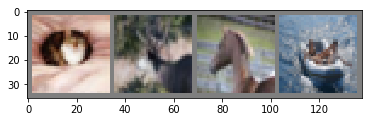

In [281]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5    # un-normalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

#### 2.2 Define a Convolutional Neural Network

Copy the neural network from the Neural Networks section before and modify it to take 3-channel images (instead of 1-channel as orignly defined)

In [282]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)  # ConvNet
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)  # classification layer
           
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
        
net = Net()

#### 2.3 Define a Loss Function and Optimizer

We'll use Classification Cross-Entropy Loss and SGD with Momentum

In [283]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#### 2.4 Train the Network

This is when things start to get interesting. We simple have to loop over our data iterator, and feed the inputs to the network and optimize.

In [284]:
for epoch in range(2):  # loop over dataset multiple times
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        
        #wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch+1}, {i+1:5d}] loss: {running_loss/2000:.3f}')
            running_loss = 0.0

print('Finished Training | Entraînement Terminé.')

[1,  2000] loss: 2.151
[1,  4000] loss: 1.834
[1,  6000] loss: 1.657
[1,  8000] loss: 1.595
[1, 10000] loss: 1.548
[1, 12000] loss: 1.502
[2,  2000] loss: 1.409
[2,  4000] loss: 1.418
[2,  6000] loss: 1.347
[2,  8000] loss: 1.334
[2, 10000] loss: 1.316
[2, 12000] loss: 1.271
Finished Training | Entraînement Terminé.


In [122]:
# Python 3.6 string formatting refresher
tmp = np.random.random()

print("%.3f" % tmp)
print("{:.3f}".format(tmp))
print(f"{tmp:.3f}")

print("%d" % 52)
print("%5d" % 52)
print(f'{52:5d}')

0.738
0.738
0.738
52
   52
   52


#### 2.5 Test the Network on Test Data

We trained the network for 2 passes over the training dataset. But we need to check if the network as learnt anything at all.

We'll check this by predicting the class label that the neural network outputs, and checking it against the ground-truth. If the prediction is correct, we add the sample to the list of correct predictions.

Okay, first step. Let's display an image from the test set to get familiar.

GroundTruth:    cat  ship  ship plane


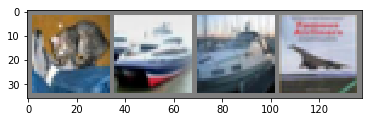

In [288]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [285]:
print('GroundTruth: ', ' '.join(f'{classes[labels[j]] for j in range(4)}'))

GroundTruth:  < g e n e r a t o r   o b j e c t   < g e n e x p r >   a t   0 x 1 1 d 9 a 1 a 4 0 >


In [287]:
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

GroundTruth:    cat  ship  ship plane


Okay, now let's see what the neural network thinks these examples above are:

In [289]:
outputs = net(Variable(images))

The outputs are energies (confidences) for the 10 classes. Let's get the index of the highest confidence:

In [290]:
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship  ship


Seems pretty good.

Now to look at how the network performs on the whole dataset.

In [295]:
correct = 0
total = 0

for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print(f'Accuracy of network on 10,000 test images: {np.round(100*correct/total,2)}%')

Accuracy of network on 10,000 test images: 54.19%


That looks way better than chance for 10 different choices (10%). Seems like the network learnt something.

What classes performed well and which didn't?:

In [296]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1
        
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 45 %
Accuracy of   car : 63 %
Accuracy of  bird : 29 %
Accuracy of   cat : 23 %
Accuracy of  deer : 41 %
Accuracy of   dog : 54 %
Accuracy of  frog : 63 %
Accuracy of horse : 70 %
Accuracy of  ship : 72 %
Accuracy of truck : 78 %


Cool, so what next?

How do we run these neural networks on the GPU?

### 3. Training on GPU

Just like how you transfer a Tensor onto a GPU, you transfer the neural net onto the GPU. This will recursively go over all modules and convert their parameters and buffers to CUDA tensors:

In [ ]:
net.cuda()

Remember that you'll have to send the inputs and targets at every step to the GPU too:

In [ ]:
inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())

Why don't we notice a MASSIVE speedup compared to CPU? Because the network is very small.

**Exercise**: Try increasing the width of your network (argument 2 of the first `nn.Conv2d`, and argument 1 of the second `nn.Conv2d` - they need to be the same number), see what kind of speedup you get.

**Goals achieved**:
* Understanding PyTorch's Tensor library and neural networks at a high level.
* Train a small neural network to classify images

### 4. Training on Multiple GPUs

If you want to see even more MASSIVE speedups using all your GPUs, please checkout [Optional: Data Parallelism](http://pytorch.org/tutorials/beginner/blitz/data_parallel_tutorial.html).

### 5. Where Next?

* [Train neural nets to play video games](http://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html)
* [Train a SotA ResNet network on ImageNet](https://github.com/pytorch/examples/tree/master/imagenet)
* [Train a face generator using Generative Adversarial Networks](https://github.com/pytorch/examples/tree/master/dcgan)
* [Train a word-level language model using Recurrent LSTM networks](https://github.com/pytorch/examples/tree/master/word_language_model)
* [More examples](https://github.com/pytorch/examples)
* [More tutorials](https://github.com/pytorch/tutorials)
* [Discuss PyTorch on the Forums](https://discuss.pytorch.org/)
* [Chat with other users on Slack](http://pytorch.slack.com/messages/beginner/)

## V. Optional: Data Parallelism
---
In this tutorial we'll learn how to use multiple GPUs using `DataParallel`.

It's very easy to use GPUs with PyTorch. You can put the model on a GPU:

In [ ]:
model.gpu()

Then, you can copy all your tensors to the GPU:

In [ ]:
mytensor = my_tensor.gpu()

Please note that just calling `mytensor.gpu()` won't copy the tensor to the GPU. You need to assign it to a new tensor and use that tensor on the GPU.

It's natural to execute your forward and backward propagations on multiple GPUs. However, PyTorch will only use one GPU by default. You can easily run your operations on multiple GPUs by making your model run parallelly using `DataParallel`:

In [ ]:
model = nn.DataParallel(model)

That's the core behind this tutorial. We'll explore it in more detail below.

### 1. Imports and Parameters

Import PyTorch modules and define parameters.

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

# Parameters and DataLoaders
input_size = 5
output_size = 2

batch_size = 30
data_size = 100

### 2. Dummy DataSet

Make a dummy (random) dataset. You just need to implement the getitem

In [ ]:
class RandomDataset(Dataset):
    
    def __init__(self, size, length):
        self.len = length
        self.data = torch.randn(length, size)
        
    def __getitem__(self, index):
        return self.data[index]
    
    def __len__(self):
        return self.len
    
rand_loader = DataLoader(dataset=RandomDataset(input_size, 100), 
                         batch_size=batch_size, shuffle=True)

### 3. Simple Model

For the demo, our model just gets an input, performs a linear operation, and gives an output. However, you can use `DataParallel` on any model (CNN, RNN, CapsuleNet, etc.)

We've placed a print statement inside the model to monitor the size of input and output tensors. Please pay attention to what is printed at batch rank 0.

In [ ]:
class Model(nn.Module):
    # Our model
    
    def __init__(self, input_size, output_size):
        super(Model, self).__init__()
        self.fc = nn.Linear(input_size, output_size)
        
    def forward(self, input):
        output = self.fc(input)
        print("  In Model; input size", input.size(), 
              "output size", output.size())
        return output

### 4. Create Model and DataParallel

This is the core part of this tutorial. First, we need to make a model instance and check if we have multiple GPUs. If we have multiple GPUs, we can wrap our model using `nn.DataParallel`. Then we can put our model on GPUs by `model.gpu()`

In [ ]:
model = Model(input_size, output_size)
if torch.cuda.device_count() > 1:
    print("Let's use", torch.cuda.device_count(), "GPUs!")
    # dim = 0 [30, xxx] -> [10, ...], [10, ...], [10, ...] on 3 GPUs
    model = nn.DataParallel(model)
    
if torch.cuda.is_available():
    model.cuda()

### 5. Run the Model

Now we can see the sizes of input and output tensors.

In [ ]:
for data in rand_loader:
    if torch.cuda.is_available():
        input_var = Variable(data.cuda())
    else:
        input_var = Variable(data)
    
    output = model(input_var)
    print("Outside: input size", input_var.size(), 
          "output_size", output.size())

### 6. Results

When we batch 30 inputs and 30 outputs, the model gets 30 and outputs 30 as expected. But if you have GPUs, then you can get results like this.

#### 6.1 2 GPUs

If you have 2, you will see:

```
# on 2 GPUs
Let's use 2 GPUs!
    In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])
    In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])
Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
    In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])
    In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])
Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
    In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])
    In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])
Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
    In Model: input size torch.Size([5, 5]) output size torch.Size([5, 2])
    In Model: input size torch.Size([5, 5]) output size torch.Size([5, 2])
Outside: input size torch.Size([10, 5]) output_size torch.Size([10, 2])
```

#### 6.2 3 GPUs

If you have 3 GPUs, you'll see:

```
Let's use 3 GPUs!
    In Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
    In Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
    In Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
    In Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
    In Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
    In Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
    In Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
    In Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
    In Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
    In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
    In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
    In Model: input size torch.Size([2, 5]) output size torch.Size([2, 2])
Outside: input size torch.Size([10, 5]) output_size torch.Size([10, 2])
```

#### 6.3 8 GPUs

And if you have 8:

```
Let's use 8 GPUs!
    In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
    In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
    In Model: input size torch.Size([2, 5]) output size torch.Size([2, 2])
    In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
    In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
    In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
    In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
    In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
    In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
    In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
    In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
    In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
    In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
    In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
    In Model: input size torch.Size([2, 5]) output size torch.Size([2, 2])
    In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
    In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
    In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
    In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
    In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
    In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
    In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
    In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
    In Model: input size torch.Size([2, 5]) output size torch.Size([2, 2])
Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
    In Model: input size torch.Size([2, 5]) output size torch.Size([2, 2])
    In Model: input size torch.Size([2, 5]) output size torch.Size([2, 2])
    In Model: input size torch.Size([2, 5]) output size torch.Size([2, 2])
    In Model: input size torch.Size([2, 5]) output size torch.Size([2, 2])
    In Model: input size torch.Size([2, 5]) output size torch.Size([2, 2])
Outside: input size torch.Size([10, 5]) output_size torch.Size([10, 2])
```

### 7. Summary

DataParallel splits your data automatically and sends job orders to multiple models on several GPUs. After each model finishes their job, DataParallel collects and merges the results before returning it to you.

For more information, please check out
http://pytorch.org/tutorials/beginner/former_torchies/parallelism_tutorial.html